# Práctica 1. Web Scraping
**Nombres:** Juan Pablo Upoff, Ponce Proaño Miguel Alejandro

**Asignatura:** M2.851 - Tipología y ciclo de vida de los datos aula 1

**Actividad:** M2.851-20202-1134081-práctica1

## Librerías utilizadas

In [169]:
import pandas as pd
import os
from os import path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
pd.set_option('float_format', '{:f}'.format)

## Obtener las rutas de las hipotecas y empresas

In [3]:
lista_archivos = [path.join('data',x) for x in os.listdir("data") if path.isfile(path.join("data",x))]
lista_rutas_hipotecas = [x for x in lista_archivos if x.find("hipotecas") != -1]
lista_rutas_empresas = [x for x in lista_archivos if x.find("empresas") != -1]
print("Los archivos de hipotecas son {flista}".format(flista=lista_rutas_hipotecas))
print("Los archivos de empresas son {flista}".format(flista=lista_rutas_empresas))

Los archivos de hipotecas son ['data/hipotecas-constituidas_4.csv', 'data/hipotecas-constituidas_2.csv', 'data/hipotecas-constituidas_5.csv', 'data/hipotecas-constituidas_1.csv', 'data/hipotecas-constituidas_3.csv']
Los archivos de empresas son ['data/empresas-activas_3.csv', 'data/empresas-activas_5.csv', 'data/empresas-activas_1.csv', 'data/empresas-activas_4.csv', 'data/empresas-activas_2.csv']


## Leer los datos de la hipotecas

In [4]:
dfs = [pd.read_csv(x) for x in lista_rutas_hipotecas]
df_hipotecas = pd.concat(dfs)
df_hipotecas.info()
df_hipotecas.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 10
Columns: 261 entries, Unnamed: 0 to Shape__Length
dtypes: float64(259), int64(1), object(1)
memory usage: 112.6+ KB


,Unnamed: 0,OBJECTID,Codigo,Texto,Numero_hipotecas_2018M02,Numero_hipotecas_2018M01,Numero_hipotecas_2017M12,Numero_hipotecas_2017M11,Numero_hipotecas_2017M10,Numero_hipotecas_2017M09,...,Importe_hipotecas_2012M09,Importe_hipotecas_2012M08,Importe_hipotecas_2012M07,Importe_hipotecas_2012M06,Importe_hipotecas_2012M05,Importe_hipotecas_2012M04,Importe_hipotecas_2012M03,cod,Shape__Area,Shape__Length
0,0,nan,nan,NaN,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,31.000000,31.000000,Navarra\n,480.000000,542.000000,341.000000,361.000000,408.000000,431.000000,...,52033.000000,71739.000000,53371.000000,74665.000000,145875.000000,73548.000000,106518.000000,31.000000,19290430805.621300,1124671.586467
2,2,32.000000,32.000000,Ourense\n,139.000000,154.000000,117.000000,90.000000,116.000000,127.000000,...,8803.000000,10818.000000,9893.000000,9337.000000,14915.000000,7928.000000,12298.000000,32.000000,13264171450.142799,808496.169678
3,3,33.000000,33.000000,Asturias\n,844.000000,778.000000,521.000000,698.000000,646.000000,688.000000,...,107893.000000,60247.000000,88807.000000,52511.000000,108214.000000,61476.000000,112716.000000,33.000000,20019595252.525398,1234891.115051
4,4,34.000000,34.000000,Palencia\n,73.000000,76.000000,72.000000,95.000000,89.000000,80.000000,...,8040.000000,8475.000000,20692.000000,16362.000000,16227.000000,9883.000000,14375.000000,34.000000,14760770924.660601,970566.905501
5,5,35.000000,35.000000,"Palmas, Las\n",836.000000,1007.000000,703.000000,731.000000,747.000000,838.000000,...,89876.000000,76764.000000,110680.000000,179643.000000,83217.000000,94960.000000,97665.000000,35.000000,5250341373.940920,1059425.571530
6,6,36.000000,36.000000,Pontevedra\n,514.000000,619.000000,415.000000,448.000000,477.000000,528.000000,...,62320.000000,106178.000000,63364.000000,49562.000000,84569.000000,41651.000000,58000.000000,36.000000,8246811088.907709,1089081.497194
7,7,37.000000,37.000000,Salamanca\n,194.000000,272.000000,191.000000,170.000000,211.000000,180.000000,...,33012.000000,15023.000000,38306.000000,31740.000000,33196.000000,24365.000000,40952.000000,37.000000,21576649161.088902,949093.601586
8,8,38.000000,38.000000,Santa Cruz de Tenerife\n,578.000000,731.000000,1275.000000,659.000000,580.000000,714.000000,...,37261.000000,70085.000000,53801.000000,64134.000000,77859.000000,49428.000000,77887.000000,38.000000,4370210415.836910,964270.952058
9,9,39.000000,39.000000,Cantabria\n,553.000000,492.000000,309.000000,439.000000,423.000000,405.000000,...,43218.000000,60634.000000,50900.000000,59406.000000,50248.000000,39344.000000,58279.000000,39.000000,10025234336.882799,1030723.273144


## Leer los datos de la empresas

In [5]:
dfs = [pd.read_csv(x) for x in lista_rutas_empresas]
df_empresas = pd.concat(dfs)
df_empresas.info()
df_empresas.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 10
Columns: 197 entries, Unnamed: 0 to Shape__Length
dtypes: float64(195), int64(1), object(1)
memory usage: 85.1+ KB


,Unnamed: 0,OBJECTID,Codigo,Texto,Total_2017,Total_2016,Total_2015,Total_2014,Total_2013,Total_2012,...,Personas_fisicas_2005,Personas_fisicas_2004,Personas_fisicas_2003,Personas_fisicas_2002,Personas_fisicas_2001,Personas_fisicas_2000,Personas_fisicas_1999,cod,Shape__Area,Shape__Length
0,0,nan,nan,NaN,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,21.000000,21.000000,Huelva\n,24424.000000,23953.000000,23776.000000,23532.000000,24184.000000,25008.000000,...,15406.000000,15567.000000,14417.000000,14162.000000,13986.000000,14248.000000,14160.000000,21.000000,16153285348.281000,835365.683870
2,2,22.000000,22.000000,Huesca\n,16464.000000,16396.000000,16305.000000,15975.000000,15960.000000,16151.000000,...,8603.000000,8654.000000,8328.000000,8252.000000,8193.000000,8487.000000,8480.000000,22.000000,28522889036.231201,1093487.926558
3,3,23.000000,23.000000,Jaén\n,33842.000000,33250.000000,33016.000000,32704.000000,33172.000000,34000.000000,...,24001.000000,23269.000000,23171.000000,22900.000000,22841.000000,23190.000000,22906.000000,23.000000,21780119684.211800,848387.076715
4,4,24.000000,24.000000,León\n,31173.000000,31427.000000,31387.000000,31134.000000,31620.000000,32386.000000,...,20033.000000,20063.000000,19942.000000,19868.000000,20111.000000,20528.000000,20471.000000,24.000000,28794563640.742199,1141075.695408
5,5,25.000000,25.000000,Lleida\n,33623.000000,33329.000000,33216.000000,33354.000000,33836.000000,34821.000000,...,18408.000000,18306.000000,17503.000000,17462.000000,17500.000000,18202.000000,18041.000000,25.000000,22090712889.822300,1149186.287266
6,6,26.000000,26.000000,"Rioja, La\n",23167.000000,23076.000000,23083.000000,22314.000000,22316.000000,22486.000000,...,12687.000000,12749.000000,12479.000000,12364.000000,12277.000000,12369.000000,12432.000000,26.000000,9220827614.749020,780721.292207
7,7,27.000000,27.000000,Lugo\n,24549.000000,24353.000000,24087.000000,23703.000000,24022.000000,24288.000000,...,15462.000000,15333.000000,15639.000000,15559.000000,15710.000000,15962.000000,15810.000000,27.000000,18447358220.066898,987981.963780
8,8,28.000000,28.000000,Madrid\n,526156.000000,516412.000000,508612.000000,494509.000000,496003.000000,499098.000000,...,226805.000000,222306.000000,211872.000000,202996.000000,204001.000000,204114.000000,206777.000000,28.000000,13901299004.089800,997240.028194
9,9,29.000000,29.000000,Málaga\n,119512.000000,115447.000000,111792.000000,107851.000000,105769.000000,107385.000000,...,58480.000000,57778.000000,53995.000000,51665.000000,50198.000000,50244.000000,48267.000000,29.000000,11424758604.587200,780458.069158


## Limpieza de los datos

### Eliminar columnas

Se eliminan las columnas que no parte del modelo.

In [6]:
df_hipotecas = df_hipotecas.drop(['Unnamed: 0'], axis=1)
df_empresas = df_empresas.drop(['Unnamed: 0'], axis=1)

### Eliminar datos nulos

In [7]:
df_hipotecas=df_hipotecas.dropna()
df_hipotecas.describe()

,OBJECTID,Codigo,Numero_hipotecas_2018M02,Numero_hipotecas_2018M01,Numero_hipotecas_2017M12,Numero_hipotecas_2017M11,Numero_hipotecas_2017M10,Numero_hipotecas_2017M09,Numero_hipotecas_2017M08,Numero_hipotecas_2017M07,...,Importe_hipotecas_2012M09,Importe_hipotecas_2012M08,Importe_hipotecas_2012M07,Importe_hipotecas_2012M06,Importe_hipotecas_2012M05,Importe_hipotecas_2012M04,Importe_hipotecas_2012M03,cod,Shape__Area,Shape__Length
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.500000,25.500000,783.380000,834.920000,561.140000,693.640000,680.700000,804.400000,713.940000,686.360000,...,80075.980000,76521.460000,83201.560000,98867.020000,98375.020000,80823.420000,94507.700000,25.500000,17427483670.800415,1029182.111908
std,14.577380,14.577380,1234.397067,1209.321649,785.231748,1044.349808,1118.764556,1209.863865,983.300656,998.307829,...,122942.422589,103957.456565,112855.264168,148960.797687,124964.711353,121077.848310,129812.217575,14.577380,8213589944.823310,264333.861911
min,1.000000,1.000000,45.000000,55.000000,29.000000,44.000000,41.000000,25.000000,27.000000,34.000000,...,4562.000000,7237.000000,5413.000000,9337.000000,7782.000000,5175.000000,8984.000000,1.000000,3756971201.462890,476274.628414
25%,13.250000,13.250000,230.500000,274.750000,176.750000,195.250000,214.250000,246.250000,214.250000,217.750000,...,23246.250000,23077.000000,28062.250000,30671.250000,30022.000000,24848.000000,26396.750000,13.250000,11403563896.938400,889612.691867
50%,25.500000,25.500000,451.500000,511.500000,336.000000,443.500000,414.500000,517.000000,458.500000,427.000000,...,45001.000000,53879.500000,49663.500000,57006.500000,73785.500000,48275.500000,71629.500000,25.500000,17131707873.102200,1000717.757211
75%,37.750000,37.750000,821.750000,893.250000,630.000000,722.750000,706.000000,794.750000,770.000000,700.750000,...,89699.250000,75507.750000,98052.500000,115756.500000,116075.250000,93042.250000,108452.250000,37.750000,22180546182.541950,1136974.668173
max,50.000000,50.000000,7715.000000,7101.000000,4936.000000,6265.000000,7147.000000,7100.000000,5740.000000,5792.000000,...,770630.000000,632200.000000,677497.000000,924745.000000,671815.000000,706459.000000,809875.000000,50.000000,35803975339.520302,1885856.050393


In [8]:
df_empresas=df_empresas.dropna()
df_empresas.describe()

,OBJECTID,Codigo,Total_2017,Total_2016,Total_2015,Total_2014,Total_2013,Total_2012,Total_2011,Total_2010,...,Personas_fisicas_2005,Personas_fisicas_2004,Personas_fisicas_2003,Personas_fisicas_2002,Personas_fisicas_2001,Personas_fisicas_2000,Personas_fisicas_1999,cod,Shape__Area,Shape__Length
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.500000,25.500000,65479.560000,64569.420000,63580.540000,62239.320000,62783.300000,63844.500000,64864.740000,65679.860000,...,35244.580000,34667.880000,33793.180000,33146.020000,32925.140000,33152.240000,32851.940000,25.500000,17427483670.800415,1029182.111908
std,14.577380,14.577380,95290.132002,93276.431082,91589.528717,89486.223924,89991.886307,90995.118634,91995.967671,92662.220667,...,45239.070153,44335.211098,42411.212992,41682.929189,41143.791551,41859.364452,42622.559657,14.577380,8213589944.823310,264333.861911
min,1.000000,1.000000,5741.000000,5790.000000,5903.000000,5794.000000,5831.000000,5907.000000,5865.000000,5885.000000,...,3642.000000,3667.000000,3688.000000,3688.000000,3676.000000,3766.000000,3769.000000,1.000000,3756971201.462890,476274.628414
25%,13.250000,13.250000,23481.250000,23295.250000,23256.250000,22880.250000,23026.000000,23205.750000,23382.250000,23710.500000,...,14178.500000,13961.250000,13959.250000,13755.000000,13340.500000,13587.000000,13622.500000,13.250000,11403563896.938400,889612.691867
50%,25.500000,25.500000,40179.500000,39861.000000,39154.000000,38357.500000,38777.000000,39590.500000,39899.500000,40268.000000,...,23358.500000,22985.000000,22260.500000,21367.500000,21271.000000,20608.500000,21359.000000,25.500000,17131707873.102200,1000717.757211
75%,37.750000,37.750000,68282.250000,67080.250000,66417.500000,64926.750000,65324.500000,66165.750000,67100.500000,67815.000000,...,38369.000000,37564.250000,36612.250000,36037.750000,36387.250000,35885.250000,35069.250000,37.750000,22180546182.541950,1136974.668173
max,50.000000,50.000000,526156.000000,516412.000000,508612.000000,494509.000000,496003.000000,499098.000000,501669.000000,503501.000000,...,242688.000000,237354.000000,229046.000000,230216.000000,222858.000000,230395.000000,236813.000000,50.000000,35803975339.520302,1885856.050393


### Tratamiento de textos

Se puede observar que la columna Texto corresponde a la ciudad, debido a que la relacion de estos dos conjuntos de datos se la realiza por el nombre de ciudad es importante realizar un tratamiento previo. Los datos que se encuentran en esta columna tienen valores con singos \n y espacios en blanco. 

In [9]:
df_hipotecas['Texto'] = df_hipotecas['Texto'].str.replace('\n','')
df_hipotecas['Texto'] = df_hipotecas['Texto'].str.strip()
df_hipotecas.head(10)

,OBJECTID,Codigo,Texto,Numero_hipotecas_2018M02,Numero_hipotecas_2018M01,Numero_hipotecas_2017M12,Numero_hipotecas_2017M11,Numero_hipotecas_2017M10,Numero_hipotecas_2017M09,Numero_hipotecas_2017M08,...,Importe_hipotecas_2012M09,Importe_hipotecas_2012M08,Importe_hipotecas_2012M07,Importe_hipotecas_2012M06,Importe_hipotecas_2012M05,Importe_hipotecas_2012M04,Importe_hipotecas_2012M03,cod,Shape__Area,Shape__Length
1,31.000000,31.000000,Navarra,480.000000,542.000000,341.000000,361.000000,408.000000,431.000000,567.000000,...,52033.000000,71739.000000,53371.000000,74665.000000,145875.000000,73548.000000,106518.000000,31.000000,19290430805.621300,1124671.586467
2,32.000000,32.000000,Ourense,139.000000,154.000000,117.000000,90.000000,116.000000,127.000000,163.000000,...,8803.000000,10818.000000,9893.000000,9337.000000,14915.000000,7928.000000,12298.000000,32.000000,13264171450.142799,808496.169678
3,33.000000,33.000000,Asturias,844.000000,778.000000,521.000000,698.000000,646.000000,688.000000,731.000000,...,107893.000000,60247.000000,88807.000000,52511.000000,108214.000000,61476.000000,112716.000000,33.000000,20019595252.525398,1234891.115051
4,34.000000,34.000000,Palencia,73.000000,76.000000,72.000000,95.000000,89.000000,80.000000,87.000000,...,8040.000000,8475.000000,20692.000000,16362.000000,16227.000000,9883.000000,14375.000000,34.000000,14760770924.660601,970566.905501
5,35.000000,35.000000,"Palmas, Las",836.000000,1007.000000,703.000000,731.000000,747.000000,838.000000,793.000000,...,89876.000000,76764.000000,110680.000000,179643.000000,83217.000000,94960.000000,97665.000000,35.000000,5250341373.940920,1059425.571530
6,36.000000,36.000000,Pontevedra,514.000000,619.000000,415.000000,448.000000,477.000000,528.000000,541.000000,...,62320.000000,106178.000000,63364.000000,49562.000000,84569.000000,41651.000000,58000.000000,36.000000,8246811088.907709,1089081.497194
7,37.000000,37.000000,Salamanca,194.000000,272.000000,191.000000,170.000000,211.000000,180.000000,170.000000,...,33012.000000,15023.000000,38306.000000,31740.000000,33196.000000,24365.000000,40952.000000,37.000000,21576649161.088902,949093.601586
8,38.000000,38.000000,Santa Cruz de Tenerife,578.000000,731.000000,1275.000000,659.000000,580.000000,714.000000,920.000000,...,37261.000000,70085.000000,53801.000000,64134.000000,77859.000000,49428.000000,77887.000000,38.000000,4370210415.836910,964270.952058
9,39.000000,39.000000,Cantabria,553.000000,492.000000,309.000000,439.000000,423.000000,405.000000,374.000000,...,43218.000000,60634.000000,50900.000000,59406.000000,50248.000000,39344.000000,58279.000000,39.000000,10025234336.882799,1030723.273144
10,40.000000,40.000000,Segovia,123.000000,97.000000,76.000000,68.000000,80.000000,114.000000,106.000000,...,10539.000000,18755.000000,14380.000000,27492.000000,14248.000000,13797.000000,12095.000000,40.000000,12228511132.837500,682490.780198


In [10]:
df_empresas['Texto'] = df_empresas['Texto'].str.replace('\n','')
df_empresas['Texto'] = df_empresas['Texto'].str.strip()
df_empresas.head(10)

,OBJECTID,Codigo,Texto,Total_2017,Total_2016,Total_2015,Total_2014,Total_2013,Total_2012,Total_2011,...,Personas_fisicas_2005,Personas_fisicas_2004,Personas_fisicas_2003,Personas_fisicas_2002,Personas_fisicas_2001,Personas_fisicas_2000,Personas_fisicas_1999,cod,Shape__Area,Shape__Length
1,21.000000,21.000000,Huelva,24424.000000,23953.000000,23776.000000,23532.000000,24184.000000,25008.000000,25812.000000,...,15406.000000,15567.000000,14417.000000,14162.000000,13986.000000,14248.000000,14160.000000,21.000000,16153285348.281000,835365.683870
2,22.000000,22.000000,Huesca,16464.000000,16396.000000,16305.000000,15975.000000,15960.000000,16151.000000,16380.000000,...,8603.000000,8654.000000,8328.000000,8252.000000,8193.000000,8487.000000,8480.000000,22.000000,28522889036.231201,1093487.926558
3,23.000000,23.000000,Jaén,33842.000000,33250.000000,33016.000000,32704.000000,33172.000000,34000.000000,34945.000000,...,24001.000000,23269.000000,23171.000000,22900.000000,22841.000000,23190.000000,22906.000000,23.000000,21780119684.211800,848387.076715
4,24.000000,24.000000,León,31173.000000,31427.000000,31387.000000,31134.000000,31620.000000,32386.000000,32669.000000,...,20033.000000,20063.000000,19942.000000,19868.000000,20111.000000,20528.000000,20471.000000,24.000000,28794563640.742199,1141075.695408
5,25.000000,25.000000,Lleida,33623.000000,33329.000000,33216.000000,33354.000000,33836.000000,34821.000000,35730.000000,...,18408.000000,18306.000000,17503.000000,17462.000000,17500.000000,18202.000000,18041.000000,25.000000,22090712889.822300,1149186.287266
6,26.000000,26.000000,"Rioja, La",23167.000000,23076.000000,23083.000000,22314.000000,22316.000000,22486.000000,22801.000000,...,12687.000000,12749.000000,12479.000000,12364.000000,12277.000000,12369.000000,12432.000000,26.000000,9220827614.749020,780721.292207
7,27.000000,27.000000,Lugo,24549.000000,24353.000000,24087.000000,23703.000000,24022.000000,24288.000000,24499.000000,...,15462.000000,15333.000000,15639.000000,15559.000000,15710.000000,15962.000000,15810.000000,27.000000,18447358220.066898,987981.963780
8,28.000000,28.000000,Madrid,526156.000000,516412.000000,508612.000000,494509.000000,496003.000000,499098.000000,501669.000000,...,226805.000000,222306.000000,211872.000000,202996.000000,204001.000000,204114.000000,206777.000000,28.000000,13901299004.089800,997240.028194
9,29.000000,29.000000,Málaga,119512.000000,115447.000000,111792.000000,107851.000000,105769.000000,107385.000000,109614.000000,...,58480.000000,57778.000000,53995.000000,51665.000000,50198.000000,50244.000000,48267.000000,29.000000,11424758604.587200,780458.069158
10,30.000000,30.000000,Murcia,93574.000000,92008.000000,90031.000000,86782.000000,87146.000000,88606.000000,90856.000000,...,49397.000000,49618.000000,46297.000000,45097.000000,44129.000000,44120.000000,43299.000000,30.000000,18250070913.321098,924896.652056


### Ordenar Columnas

In [11]:
df_hipotecas = df_hipotecas.sort_values(by=['Codigo'])
df_hipotecas.head(10)

,OBJECTID,Codigo,Texto,Numero_hipotecas_2018M02,Numero_hipotecas_2018M01,Numero_hipotecas_2017M12,Numero_hipotecas_2017M11,Numero_hipotecas_2017M10,Numero_hipotecas_2017M09,Numero_hipotecas_2017M08,...,Importe_hipotecas_2012M09,Importe_hipotecas_2012M08,Importe_hipotecas_2012M07,Importe_hipotecas_2012M06,Importe_hipotecas_2012M05,Importe_hipotecas_2012M04,Importe_hipotecas_2012M03,cod,Shape__Area,Shape__Length
1,1.000000,1.000000,Araba/Álava,310.000000,339.000000,377.000000,389.000000,334.000000,407.000000,183.000000,...,77746.000000,27400.000000,56979.000000,41202.000000,75141.000000,70167.000000,109097.000000,1.000000,5558819816.938479,899065.384761
2,2.000000,2.000000,Albacete,258.000000,391.000000,240.000000,208.000000,238.000000,541.000000,462.000000,...,13158.000000,22060.000000,16208.000000,44780.000000,29274.000000,17625.000000,23846.000000,2.000000,24628869196.668800,982714.983177
3,3.000000,3.000000,Alicante,1679.000000,1801.000000,1169.000000,1395.000000,1251.000000,1711.000000,1430.000000,...,133786.000000,156306.000000,136208.000000,157793.000000,136956.000000,122338.000000,175471.000000,3.000000,9507175453.609671,698396.737290
4,4.000000,4.000000,Almería,647.000000,686.000000,515.000000,824.000000,726.000000,791.000000,626.000000,...,101758.000000,78762.000000,76833.000000,174120.000000,74816.000000,80301.000000,75803.000000,4.000000,13855293063.925501,764383.039721
5,5.000000,5.000000,Ávila,93.000000,110.000000,89.000000,98.000000,84.000000,95.000000,53.000000,...,10787.000000,10043.000000,13390.000000,22596.000000,23815.000000,15627.000000,13539.000000,5.000000,13966290552.547899,825947.526118
6,6.000000,6.000000,Badajoz,367.000000,477.000000,308.000000,357.000000,439.000000,409.000000,455.000000,...,27685.000000,63351.000000,30193.000000,30315.000000,41804.000000,37071.000000,38666.000000,6.000000,35803975339.520302,1452266.342878
7,7.000000,7.000000,"Balears, Illes",1459.000000,1320.000000,952.000000,1088.000000,1061.000000,1280.000000,1247.000000,...,131489.000000,122059.000000,157523.000000,135495.000000,185353.000000,167238.000000,127827.000000,7.000000,8397658655.339479,1885856.050393
8,8.000000,8.000000,Barcelona,4246.000000,5127.000000,2607.000000,4222.000000,3844.000000,5011.000000,3808.000000,...,445918.000000,371633.000000,455377.000000,578899.000000,597092.000000,549847.000000,519292.000000,8.000000,13892170189.546900,1078129.191819
9,9.000000,9.000000,Burgos,238.000000,287.000000,211.000000,191.000000,259.000000,266.000000,307.000000,...,32970.000000,32649.000000,48427.000000,33880.000000,45800.000000,45595.000000,51274.000000,9.000000,26203492774.133999,1530155.700442
10,10.000000,10.000000,Cáceres,184.000000,252.000000,213.000000,112.000000,152.000000,242.000000,214.000000,...,15118.000000,13828.000000,27352.000000,20694.000000,29100.000000,21753.000000,22753.000000,10.000000,33620075321.108898,1242300.636382


In [12]:
df_empresas = df_empresas.sort_values(by=['Codigo'])
df_empresas.head(10)

,OBJECTID,Codigo,Texto,Total_2017,Total_2016,Total_2015,Total_2014,Total_2013,Total_2012,Total_2011,...,Personas_fisicas_2005,Personas_fisicas_2004,Personas_fisicas_2003,Personas_fisicas_2002,Personas_fisicas_2001,Personas_fisicas_2000,Personas_fisicas_1999,cod,Shape__Area,Shape__Length
1,1.000000,1.000000,Araba/Álava,18518.000000,20034.000000,19548.000000,19652.000000,20121.000000,20644.000000,21192.000000,...,10568.000000,10783.000000,11065.000000,11269.000000,11452.000000,11787.000000,11613.000000,1.000000,5558819816.938479,899065.384761
2,2.000000,2.000000,Albacete,26921.000000,26884.000000,26701.000000,26184.000000,26030.000000,26400.000000,26839.000000,...,14148.000000,13792.000000,13432.000000,13229.000000,13208.000000,13389.000000,13472.000000,2.000000,24628869196.668800,982714.983177
3,3.000000,3.000000,Alicante,135480.000000,133124.000000,130438.000000,126389.000000,127748.000000,129728.000000,131564.000000,...,68870.000000,65049.000000,65628.000000,63757.000000,62211.000000,60564.000000,58355.000000,3.000000,9507175453.609671,698396.737290
4,4.000000,4.000000,Almería,42329.000000,41212.000000,40327.000000,39530.000000,40549.000000,41021.000000,41581.000000,...,23512.000000,22522.000000,21504.000000,20750.000000,20142.000000,20271.000000,19926.000000,4.000000,13855293063.925501,764383.039721
5,5.000000,5.000000,Ávila,10178.000000,10080.000000,10175.000000,10046.000000,10316.000000,10735.000000,10740.000000,...,7353.000000,7280.000000,7320.000000,7137.000000,7228.000000,7410.000000,7405.000000,5.000000,13966290552.547899,825947.526118
6,6.000000,6.000000,Badajoz,40773.000000,40494.000000,39640.000000,38631.000000,38822.000000,39433.000000,39426.000000,...,25060.000000,24074.000000,24482.000000,24288.000000,24065.000000,25085.000000,23623.000000,6.000000,35803975339.520302,1452266.342878
7,7.000000,7.000000,"Balears, Illes",93067.000000,89341.000000,87111.000000,84270.000000,85044.000000,85372.000000,87461.000000,...,48383.000000,48825.000000,43403.000000,42813.000000,42337.000000,42313.000000,41860.000000,7.000000,8397658655.339479,1885856.050393
8,8.000000,8.000000,Barcelona,460778.000000,450451.000000,441119.000000,434914.000000,438385.000000,446147.000000,453485.000000,...,242688.000000,237354.000000,229046.000000,230216.000000,222858.000000,230395.000000,236813.000000,8.000000,13892170189.546900,1078129.191819
9,9.000000,9.000000,Burgos,25811.000000,25583.000000,25301.000000,24761.000000,25072.000000,25196.000000,25208.000000,...,14138.000000,14018.000000,13902.000000,13695.000000,13738.000000,14181.000000,14074.000000,9.000000,26203492774.133999,1530155.700442
10,10.000000,10.000000,Cáceres,25071.000000,24990.000000,24835.000000,24298.000000,24531.000000,25238.000000,25677.000000,...,17153.000000,13953.000000,16483.000000,16708.000000,9119.000000,9266.000000,10110.000000,10.000000,33620075321.108898,1242300.636382


## Tramiento Datos Empresas

Se convierte las columnas en filas para realizar un presentacion de las hipotecas por año.

In [172]:
df_empresas_anio = df_empresas.melt(id_vars=["OBJECTID","Codigo","Texto"],value_name="Total")
print(df_empresas_anio.info())
df_empresas_anio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  9650 non-null   float64
 1   Codigo    9650 non-null   float64
 2   Texto     9650 non-null   object 
 3   variable  9650 non-null   object 
 4   Total     9650 non-null   float64
dtypes: float64(3), object(2)
memory usage: 377.1+ KB
None


,OBJECTID,Codigo,Texto,variable,Total
0,1.000000,1.000000,Araba/Álava,Total_2017,18518.000000
1,2.000000,2.000000,Albacete,Total_2017,26921.000000
2,3.000000,3.000000,Alicante,Total_2017,135480.000000
3,4.000000,4.000000,Almería,Total_2017,42329.000000
4,5.000000,5.000000,Ávila,Total_2017,10178.000000
...,...,...,...,...,...
9645,46.000000,46.000000,Valencia/Valéncia,Shape__Length,1006499.318813
9646,47.000000,47.000000,Valladolid,Shape__Length,993224.077367
9647,48.000000,48.000000,Bizkaia,Shape__Length,618804.570091
9648,49.000000,49.000000,Zamora,Shape__Length,1017874.534827


### Eliminar variables diferntes tipo Shape_lenght

Se eliminan aquellas variables tipo Shape_lenght, ya que corresponde a datos geográficos que tambien estan presentente en las hipotecas.

In [14]:
df_empresas_anio = df_empresas_anio[(df_empresas_anio['variable'] != 'Shape__Area') 
                                    & (df_empresas_anio['variable'] != 'Shape__Length') 
                                   & (df_empresas_anio['variable'] != 'cod') ]
df_empresas_anio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  9500 non-null   float64
 1   Codigo    9500 non-null   float64
 2   Texto     9500 non-null   object 
 3   variable  9500 non-null   object 
 4   Total     9500 non-null   float64
dtypes: float64(3), object(2)
memory usage: 445.3+ KB


### Inclusion de Atributo Año

In [15]:
df_empresas_anio['Anio'] = df_empresas_anio['variable'].apply(lambda val: val[len(val)-4:len(val)])
df_empresas_anio["Anio"] = pd.to_numeric(df_empresas_anio["Anio"])
print(df_empresas_anio['Anio'].describe())
df_empresas_anio.head(10)

count   9500.000000
mean    2008.000000
std        5.477514
min     1999.000000
25%     2003.000000
50%     2008.000000
75%     2013.000000
max     2017.000000
Name: Anio, dtype: float64


,OBJECTID,Codigo,Texto,variable,Total,Anio
0,1.000000,1.000000,Araba/Álava,Total_2017,18518.000000,2017
1,2.000000,2.000000,Albacete,Total_2017,26921.000000,2017
2,3.000000,3.000000,Alicante,Total_2017,135480.000000,2017
3,4.000000,4.000000,Almería,Total_2017,42329.000000,2017
4,5.000000,5.000000,Ávila,Total_2017,10178.000000,2017
5,6.000000,6.000000,Badajoz,Total_2017,40773.000000,2017
6,7.000000,7.000000,"Balears, Illes",Total_2017,93067.000000,2017
7,8.000000,8.000000,Barcelona,Total_2017,460778.000000,2017
8,9.000000,9.000000,Burgos,Total_2017,25811.000000,2017
9,10.000000,10.000000,Cáceres,Total_2017,25071.000000,2017


In [16]:
df_empresas_anio['TipoEmpresa'] = df_empresas_anio['variable'].apply(lambda val: val[0:len(val)-5])
df_empresas_anio = df_empresas_anio.drop(['variable'], axis=1)
print("Se muestra los tipos",np.unique(df_empresas_anio['TipoEmpresa']))
df_empresas_anio.head(10)

Se muestra los tipos ['Asociaciones_y_otros' 'Comunidades_de_bienes'
 'Organismos_autonomos_y_otros' 'Personas_fisicas' 'Sociedad_Anonima'
 'Sociedades_Cooperativas' 'Sociedades_colectivas'
 'Sociedades_comanditarias' 'Sociedades_responsabilidad-limitada' 'Total']


,OBJECTID,Codigo,Texto,Total,Anio,TipoEmpresa
0,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total
1,2.000000,2.000000,Albacete,26921.000000,2017,Total
2,3.000000,3.000000,Alicante,135480.000000,2017,Total
3,4.000000,4.000000,Almería,42329.000000,2017,Total
4,5.000000,5.000000,Ávila,10178.000000,2017,Total
5,6.000000,6.000000,Badajoz,40773.000000,2017,Total
6,7.000000,7.000000,"Balears, Illes",93067.000000,2017,Total
7,8.000000,8.000000,Barcelona,460778.000000,2017,Total
8,9.000000,9.000000,Burgos,25811.000000,2017,Total
9,10.000000,10.000000,Cáceres,25071.000000,2017,Total


## Tramiento Datos Hipotecas

In [17]:
columnas_base = ["OBJECTID","Codigo","Texto","cod","Shape__Area","Shape__Length"]
columnas_pivot = [x for x in df_hipotecas.columns if x not in columnas_base]
df_hipotecas_pivot = pd.melt(df_hipotecas, id_vars=columnas_base, value_vars=columnas_pivot)
df_hipotecas_pivot

,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,variable,value
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas_2018M02,310.000000
1,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas_2018M02,258.000000
2,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas_2018M02,1679.000000
3,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas_2018M02,647.000000
4,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas_2018M02,93.000000
...,...,...,...,...,...,...,...,...
12695,46.000000,46.000000,Valencia/Valéncia,46.000000,18110130397.923401,1006499.318813,Importe_hipotecas_2012M03,130802.000000
12696,47.000000,47.000000,Valladolid,47.000000,14531327306.301500,993224.077367,Importe_hipotecas_2012M03,135383.000000
12697,48.000000,48.000000,Bizkaia,48.000000,4161383760.410160,618804.570091,Importe_hipotecas_2012M03,84451.000000
12698,49.000000,49.000000,Zamora,49.000000,18976873417.340801,1017874.534827,Importe_hipotecas_2012M03,17940.000000


### Inclusion de Atributos Año y Mes

In [18]:
df_hipotecas_pivot['Anio'] = df_hipotecas_pivot['variable'].apply(lambda val: val[len(val)-7:len(val)-3])
df_hipotecas_pivot["Anio"] = pd.to_numeric(df_hipotecas_pivot["Anio"])
print(df_hipotecas_pivot['Anio'].describe())
df_hipotecas_pivot.head(10)

count   12700.000000
mean     2011.385827
std         4.341961
min      2003.000000
25%      2008.000000
50%      2012.000000
75%      2015.000000
max      2018.000000
Name: Anio, dtype: float64


,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,variable,value,Anio
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas_2018M02,310.000000,2018
1,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas_2018M02,258.000000,2018
2,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas_2018M02,1679.000000,2018
3,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas_2018M02,647.000000,2018
4,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas_2018M02,93.000000,2018
5,6.000000,6.000000,Badajoz,6.000000,35803975339.520302,1452266.342878,Numero_hipotecas_2018M02,367.000000,2018
6,7.000000,7.000000,"Balears, Illes",7.000000,8397658655.339479,1885856.050393,Numero_hipotecas_2018M02,1459.000000,2018
7,8.000000,8.000000,Barcelona,8.000000,13892170189.546900,1078129.191819,Numero_hipotecas_2018M02,4246.000000,2018
8,9.000000,9.000000,Burgos,9.000000,26203492774.133999,1530155.700442,Numero_hipotecas_2018M02,238.000000,2018
9,10.000000,10.000000,Cáceres,10.000000,33620075321.108898,1242300.636382,Numero_hipotecas_2018M02,184.000000,2018


In [19]:
df_hipotecas_pivot['Mes'] = df_hipotecas_pivot['variable'].apply(lambda val: val[len(val)-3:len(val)])
meses = np.unique(df_hipotecas_pivot['Mes'])
print("Se muestra los tipos meses",meses)
df_hipotecas_pivot.head(10)

Se muestra los tipos meses ['M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'M11' 'M12']


,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,variable,value,Anio,Mes
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas_2018M02,310.000000,2018,M02
1,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas_2018M02,258.000000,2018,M02
2,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas_2018M02,1679.000000,2018,M02
3,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas_2018M02,647.000000,2018,M02
4,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas_2018M02,93.000000,2018,M02
5,6.000000,6.000000,Badajoz,6.000000,35803975339.520302,1452266.342878,Numero_hipotecas_2018M02,367.000000,2018,M02
6,7.000000,7.000000,"Balears, Illes",7.000000,8397658655.339479,1885856.050393,Numero_hipotecas_2018M02,1459.000000,2018,M02
7,8.000000,8.000000,Barcelona,8.000000,13892170189.546900,1078129.191819,Numero_hipotecas_2018M02,4246.000000,2018,M02
8,9.000000,9.000000,Burgos,9.000000,26203492774.133999,1530155.700442,Numero_hipotecas_2018M02,238.000000,2018,M02
9,10.000000,10.000000,Cáceres,10.000000,33620075321.108898,1242300.636382,Numero_hipotecas_2018M02,184.000000,2018,M02


In [20]:
df_hipotecas_pivot['TipoHipoteca'] = df_hipotecas_pivot['variable'].apply(lambda val: val[0:len(val)-8])
df_hipotecas_pivot = df_hipotecas_pivot.drop(['variable'], axis=1)
print("Se muestra los tipos",np.unique(df_hipotecas_pivot['TipoHipoteca']))
df_hipotecas_pivot.head(10)

Se muestra los tipos ['Importe_hipotecas' 'Numero_hipotecas']


,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,value,Anio,Mes,TipoHipoteca
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,310.000000,2018,M02,Numero_hipotecas
1,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,258.000000,2018,M02,Numero_hipotecas
2,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,1679.000000,2018,M02,Numero_hipotecas
3,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,647.000000,2018,M02,Numero_hipotecas
4,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,93.000000,2018,M02,Numero_hipotecas
5,6.000000,6.000000,Badajoz,6.000000,35803975339.520302,1452266.342878,367.000000,2018,M02,Numero_hipotecas
6,7.000000,7.000000,"Balears, Illes",7.000000,8397658655.339479,1885856.050393,1459.000000,2018,M02,Numero_hipotecas
7,8.000000,8.000000,Barcelona,8.000000,13892170189.546900,1078129.191819,4246.000000,2018,M02,Numero_hipotecas
8,9.000000,9.000000,Burgos,9.000000,26203492774.133999,1530155.700442,238.000000,2018,M02,Numero_hipotecas
9,10.000000,10.000000,Cáceres,10.000000,33620075321.108898,1242300.636382,184.000000,2018,M02,Numero_hipotecas


### Se convierte los meses en variables 

In [21]:
columnas_base = ["OBJECTID","Codigo","Texto","cod","Shape__Area","Shape__Length","TipoHipoteca","Anio"]
df_hipotecas_meses_anio = df_hipotecas_pivot.pivot(index=columnas_base, columns="Mes", values="value")
df_hipotecas_meses_anio = df_hipotecas_meses_anio.reset_index()
df_hipotecas_meses_anio.head(10)

Mes,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,TipoHipoteca,Anio,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2012,nan,nan,109097.000000,70167.000000,75141.000000,41202.000000,56979.000000,27400.000000,77746.000000,92029.000000,58120.000000,62563.000000
1,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2013,76596.000000,77317.000000,77911.000000,71916.000000,52847.000000,29996.000000,35099.000000,10177.000000,50122.000000,27207.000000,34151.000000,16957.000000
2,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2014,18828.000000,51157.000000,30903.000000,15557.000000,24386.000000,29638.000000,25091.000000,9875.000000,25213.000000,19657.000000,33481.000000,21982.000000
3,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2015,30712.000000,33470.000000,29337.000000,24546.000000,31104.000000,25872.000000,34596.000000,17944.000000,32349.000000,54056.000000,21433.000000,24121.000000
4,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2016,42049.000000,58207.000000,37599.000000,28861.000000,53815.000000,28969.000000,29093.000000,10882.000000,35943.000000,24863.000000,31523.000000,22448.000000
5,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2017,48296.000000,57233.000000,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
6,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2018,55970.000000,48592.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2003,587.000000,638.000000,570.000000,573.000000,675.000000,770.000000,760.000000,381.000000,547.000000,733.000000,630.000000,636.000000
8,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2004,611.000000,833.000000,1086.000000,672.000000,850.000000,866.000000,867.000000,616.000000,824.000000,642.000000,575.000000,603.000000
9,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2005,1164.000000,666.000000,839.000000,698.000000,777.000000,849.000000,842.000000,441.000000,943.000000,792.000000,770.000000,628.000000


### Reemplazar valores vacios por ceros

In [22]:
df_hipotecas_meses_anio = df_hipotecas_meses_anio.fillna(0)
df_hipotecas_meses_anio.describe()

Mes,OBJECTID,Codigo,cod,Shape__Area,Shape__Length,Anio,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,25.500000,25.500000,25.500000,17427483670.800419,1029182.111908,2011.869565,25076.040870,24998.086957,22332.654783,21642.890435,24088.268696,22897.289565,21765.317391,21406.380000,24060.789565,21233.993043,20707.743478,17856.338261
std,14.437148,14.437148,14.437148,8134576748.715783,261791.019693,4.506106,98288.384032,98519.821932,80804.367394,85118.663637,93392.849984,86467.131202,82732.909703,87265.163743,101074.048362,85947.200832,80002.573741,69349.196842
min,1.000000,1.000000,1.000000,3756971201.462890,476274.628414,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,13.000000,13.000000,11396498994.388800,887721.466661,2008.000000,497.000000,440.500000,398.250000,355.500000,393.750000,377.500000,353.000000,326.250000,383.250000,348.500000,352.500000,324.250000
50%,25.500000,25.500000,25.500000,17131707873.102200,1000717.757211,2013.000000,1421.000000,1347.000000,1331.000000,1192.000000,1331.000000,1333.000000,1260.500000,1112.500000,1272.000000,1131.000000,1148.000000,1017.500000
75%,38.000000,38.000000,38.000000,22210490613.448502,1141075.695408,2016.000000,9631.500000,9776.750000,9847.000000,8076.250000,10019.000000,9598.500000,9503.000000,8545.750000,9396.000000,8932.000000,8308.750000,6789.500000
max,50.000000,50.000000,50.000000,35803975339.520302,1885856.050393,2018.000000,1452832.000000,1440522.000000,1162658.000000,1250540.000000,1860802.000000,1407849.000000,1173087.000000,1315821.000000,1603660.000000,1663146.000000,1354097.000000,1015187.000000


## Integración de conjuntos de datos

Para la integración de los datos se realiza un enlace ente los campos Codigo y Anio ya que son la variables que representan las caracterisitcas de los datos. Se realiza la integracion de los conjuntos df_hipotecas_meses_anio y
df_empresas_anio.

In [23]:
df_empresas_hipotecas = pd.merge(df_empresas_anio, df_hipotecas_meses_anio,how='left', on=["Codigo", "Anio","OBJECTID","Texto"])
print(df_empresas_hipotecas.info())
df_empresas_hipotecas.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       12500 non-null  float64
 1   Codigo         12500 non-null  float64
 2   Texto          12500 non-null  object 
 3   Total          12500 non-null  float64
 4   Anio           12500 non-null  int64  
 5   TipoEmpresa    12500 non-null  object 
 6   cod            10500 non-null  float64
 7   Shape__Area    10500 non-null  float64
 8   Shape__Length  10500 non-null  float64
 9   TipoHipoteca   10500 non-null  object 
 10  M01            10500 non-null  float64
 11  M02            10500 non-null  float64
 12  M03            10500 non-null  float64
 13  M04            10500 non-null  float64
 14  M05            10500 non-null  float64
 15  M06            10500 non-null  float64
 16  M07            10500 non-null  float64
 17  M08            10500 non-null  float64
 18  M09   

,OBJECTID,Codigo,Texto,Total,Anio,TipoEmpresa,cod,Shape__Area,Shape__Length,TipoHipoteca,...,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,...,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
1,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,...,597.000000,263.000000,299.000000,244.000000,273.000000,183.000000,407.000000,334.000000,389.000000,377.000000
2,2.000000,2.000000,Albacete,26921.000000,2017,Total,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,...,28018.000000,19598.000000,52585.000000,23393.000000,44807.000000,35571.000000,44849.000000,16399.000000,38425.000000,23339.000000
3,2.000000,2.000000,Albacete,26921.000000,2017,Total,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,...,345.000000,202.000000,387.000000,288.000000,608.000000,462.000000,541.000000,238.000000,208.000000,240.000000
4,3.000000,3.000000,Alicante,135480.000000,2017,Total,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,...,210355.000000,222585.000000,153248.000000,157547.000000,121150.000000,128666.000000,206276.000000,125571.000000,150514.000000,115540.000000
5,3.000000,3.000000,Alicante,135480.000000,2017,Total,3.000000,9507175453.609671,698396.737290,Numero_hipotecas,...,1871.000000,1266.000000,1899.000000,1684.000000,1360.000000,1430.000000,1711.000000,1251.000000,1395.000000,1169.000000
6,4.000000,4.000000,Almería,42329.000000,2017,Total,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,...,79137.000000,100574.000000,63395.000000,55218.000000,54463.000000,161397.000000,109346.000000,64817.000000,114675.000000,66255.000000
7,4.000000,4.000000,Almería,42329.000000,2017,Total,4.000000,13855293063.925501,764383.039721,Numero_hipotecas,...,713.000000,611.000000,711.000000,662.000000,524.000000,626.000000,791.000000,726.000000,824.000000,515.000000
8,5.000000,5.000000,Ávila,10178.000000,2017,Total,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,...,5413.000000,8598.000000,6185.000000,8805.000000,7332.000000,3406.000000,8994.000000,6545.000000,7827.000000,6345.000000
9,5.000000,5.000000,Ávila,10178.000000,2017,Total,5.000000,13966290552.547899,825947.526118,Numero_hipotecas,...,79.000000,66.000000,76.000000,84.000000,96.000000,53.000000,95.000000,84.000000,98.000000,89.000000


### Exportar conjunto de datos

In [162]:
df_empresas_hipotecas.to_csv('../csv/empresas_hipotecas_españa.csv')

## Representaciones Gráficas


In [45]:
columnas_base = ["OBJECTID","Codigo","Texto","cod","Shape__Area","Shape__Length","TipoHipoteca","Anio","TipoEmpresa","Total"]
df_total_mes = df_empresas_hipotecas.melt(id_vars=columnas_base,var_name="Mes",value_name="TotalMes")
df_total_mes.head(10)

,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,TipoHipoteca,Anio,TipoEmpresa,Total,Mes,TotalMes
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,2017,Total,18518.000000,M01,48296.000000
1,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938479,899065.384761,Numero_hipotecas,2017,Total,18518.000000,M01,343.000000
2,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,2017,Total,26921.000000,M01,18417.000000
3,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,2017,Total,26921.000000,M01,210.000000
4,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,2017,Total,135480.000000,M01,165330.000000
5,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas,2017,Total,135480.000000,M01,1620.000000
6,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,2017,Total,42329.000000,M01,53648.000000
7,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas,2017,Total,42329.000000,M01,533.000000
8,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,2017,Total,10178.000000,M01,5644.000000
9,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas,2017,Total,10178.000000,M01,87.000000


[Text(0, 0, 'Total'),
 Text(1, 0, 'Sociedad_Anonima'),
 Text(2, 0, 'Sociedades_responsabilidad-limitada'),
 Text(3, 0, 'Sociedades_colectivas'),
 Text(4, 0, 'Sociedades_comanditarias'),
 Text(5, 0, 'Comunidades_de_bienes'),
 Text(6, 0, 'Sociedades_Cooperativas'),
 Text(7, 0, 'Asociaciones_y_otros'),
 Text(8, 0, 'Organismos_autonomos_y_otros'),
 Text(9, 0, 'Personas_fisicas')]

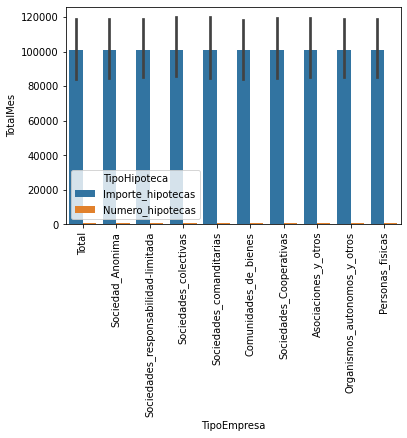

In [46]:
df_anio_2017 = df_total_mes[(df_total_mes['Anio']==2017)]
df_anio_2017.head(10)
ax=sns.barplot(x='TipoEmpresa', y='TotalMes', hue='TipoHipoteca', data=df_anio_2017)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Gráfica Totales Mes Hipotecas y Tipo de Empresa

En la gráfica se puede observar que no los reigstros de importe de hipotecas se empiezan a registrar desde el año 2012, este información es importante si deseamos realizar analisis de regresión o modelos de clasifiación.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1999'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017')])

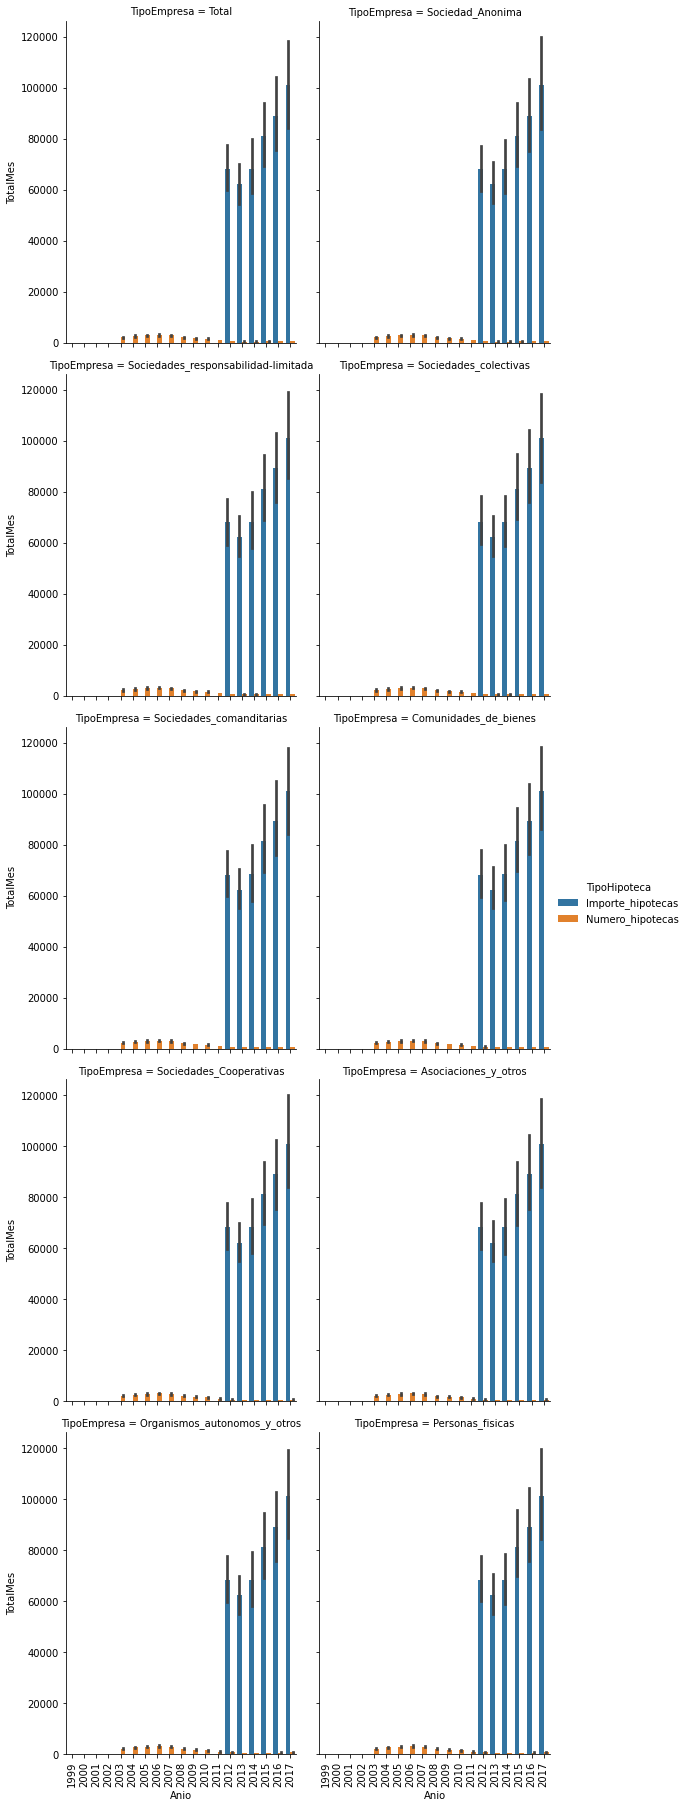

In [76]:
ax1=sns.catplot(x='Anio', y='TotalMes', hue='TipoHipoteca',
               col="TipoEmpresa",data=df_total_mes,kind="bar",col_wrap=2,
                height=5, aspect=.8)
ax1.set_xticklabels(rotation=90)
plt.xticks(rotation=90)

# Analisis de regresion

Una vez tratados los datos y obtenido algunas conclusines, se  puede luego empezar a plantera problemassobre el mismo se puede considerar la regresión como un método para medir la cantidad de Empresas Abieras. Se sugiere realizar una contrastación contra otros algoritmos y adicionalmente validar los resultados con juicios de expertos en el contexto que el problema este definido.


In [118]:
df_emp_hip_sub =df_empresas_hipotecas[(df_empresas_hipotecas['Anio']>=2012)
                                      &(df_empresas_hipotecas['Anio']<=2017)
                                     &(df_empresas_hipotecas['TipoEmpresa']=='Sociedad_Anonima')
                                     &(df_empresas_hipotecas['TipoHipoteca']=='Importe_hipotecas')]
print(df_emp_hip_sub.info())
df_emp_hip_sub.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1250 to 1848
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       300 non-null    float64
 1   Codigo         300 non-null    float64
 2   Texto          300 non-null    object 
 3   Total          300 non-null    float64
 4   Anio           300 non-null    int64  
 5   TipoEmpresa    300 non-null    object 
 6   cod            300 non-null    float64
 7   Shape__Area    300 non-null    float64
 8   Shape__Length  300 non-null    float64
 9   TipoHipoteca   300 non-null    object 
 10  M01            300 non-null    float64
 11  M02            300 non-null    float64
 12  M03            300 non-null    float64
 13  M04            300 non-null    float64
 14  M05            300 non-null    float64
 15  M06            300 non-null    float64
 16  M07            300 non-null    float64
 17  M08            300 non-null    float64
 18  M09   

,OBJECTID,Codigo,Texto,Total,Anio,TipoEmpresa,cod,Shape__Area,Shape__Length,TipoHipoteca,...,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
1250,1.000000,1.000000,Araba/Álava,828.000000,2017,Sociedad_Anonima,1.000000,5558819816.938479,899065.384761,Importe_hipotecas,...,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
1252,2.000000,2.000000,Albacete,488.000000,2017,Sociedad_Anonima,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,...,28018.000000,19598.000000,52585.000000,23393.000000,44807.000000,35571.000000,44849.000000,16399.000000,38425.000000,23339.000000
1254,3.000000,3.000000,Alicante,1650.000000,2017,Sociedad_Anonima,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,...,210355.000000,222585.000000,153248.000000,157547.000000,121150.000000,128666.000000,206276.000000,125571.000000,150514.000000,115540.000000
1256,4.000000,4.000000,Almería,617.000000,2017,Sociedad_Anonima,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,...,79137.000000,100574.000000,63395.000000,55218.000000,54463.000000,161397.000000,109346.000000,64817.000000,114675.000000,66255.000000
1258,5.000000,5.000000,Ávila,130.000000,2017,Sociedad_Anonima,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,...,5413.000000,8598.000000,6185.000000,8805.000000,7332.000000,3406.000000,8994.000000,6545.000000,7827.000000,6345.000000
1260,6.000000,6.000000,Badajoz,639.000000,2017,Sociedad_Anonima,6.000000,35803975339.520302,1452266.342878,Importe_hipotecas,...,34165.000000,29641.000000,55736.000000,34778.000000,27405.000000,37356.000000,41243.000000,40108.000000,24720.000000,28466.000000
1262,7.000000,7.000000,"Balears, Illes",2351.000000,2017,Sociedad_Anonima,7.000000,8397658655.339479,1885856.050393,Importe_hipotecas,...,227123.000000,174105.000000,300946.000000,277222.000000,279123.000000,220866.000000,289389.000000,193939.000000,222455.000000,207790.000000
1264,8.000000,8.000000,Barcelona,14887.000000,2017,Sociedad_Anonima,8.000000,13892170189.546900,1078129.191819,Importe_hipotecas,...,725512.000000,578403.000000,773931.000000,716581.000000,748531.000000,734981.000000,810622.000000,609980.000000,789609.000000,478835.000000
1266,9.000000,9.000000,Burgos,662.000000,2017,Sociedad_Anonima,9.000000,26203492774.133999,1530155.700442,Importe_hipotecas,...,32329.000000,29804.000000,24443.000000,20993.000000,23892.000000,24705.000000,27385.000000,27755.000000,28738.000000,23864.000000
1268,10.000000,10.000000,Cáceres,332.000000,2017,Sociedad_Anonima,10.000000,33620075321.108898,1242300.636382,Importe_hipotecas,...,15486.000000,7744.000000,30604.000000,33131.000000,13920.000000,30120.000000,17151.000000,17418.000000,15368.000000,26674.000000


### Exportar conjunto de datos

In [163]:
df_emp_hip_sub.to_csv('../csv/empresas_hipotecas_españa_2012_2017.csv')

### Pipe Lines Conversion de Datos

In [136]:
class DataLabelEncoderTransform(TransformerMixin):    
    def fit(self, df):
        return self
    
    def transform(self, df):
        col_numericas = df._get_numeric_data().columns.values.tolist()
        col_categoricas = [v for v in columnas if v not in col_numericas]
        df_temp = df.copy()
        for col in col_categoricas:
            df_temp[col] = df_temp[col].astype(str)
        encoder = LabelEncoder()        
        df_encoder= df_temp[col_categoricas].apply(encoder.fit_transform)             
        return pd.concat([df[col_numericas],df_encoder],axis=1),col_categoricas
    
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):    
        data = X.copy()        
        return data.drop(labels=self.columns, axis='columns')

In [121]:
df_emp_hip_encoder,col_categoricas = DataLabelEncoderTransform().fit_transform(df_emp_hip_sub)
df_emp_hip_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1250 to 1848
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       300 non-null    float64
 1   Codigo         300 non-null    float64
 2   Total          300 non-null    float64
 3   Anio           300 non-null    int64  
 4   cod            300 non-null    float64
 5   Shape__Area    300 non-null    float64
 6   Shape__Length  300 non-null    float64
 7   M01            300 non-null    float64
 8   M02            300 non-null    float64
 9   M03            300 non-null    float64
 10  M04            300 non-null    float64
 11  M05            300 non-null    float64
 12  M06            300 non-null    float64
 13  M07            300 non-null    float64
 14  M08            300 non-null    float64
 15  M09            300 non-null    float64
 16  M10            300 non-null    float64
 17  M11            300 non-null    float64
 18  M12   

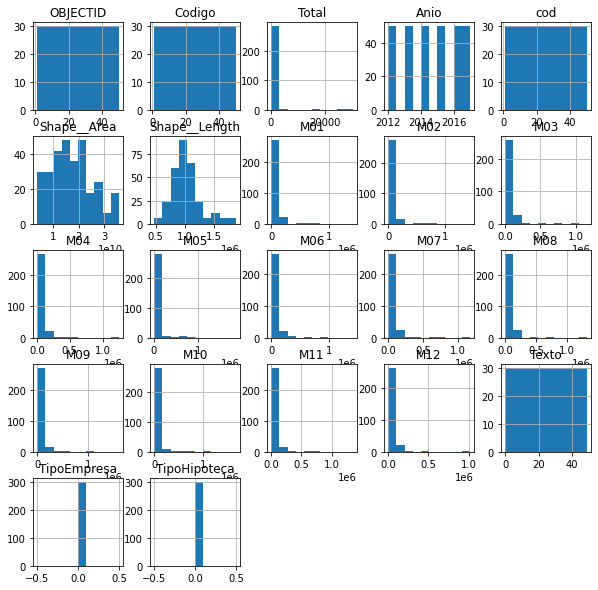

In [122]:
hist = df_emp_hip_encoder.hist(figsize=(10,10))

In [138]:
columnas_eliminar = ["OBJECTID","Codigo","cod","Texto"]
df_emp_hip = DropColumns(columns=columnas_eliminar).fit_transform(df_emp_hip_encoder)
df_emp_hip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1250 to 1848
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total          300 non-null    float64
 1   Anio           300 non-null    int64  
 2   Shape__Area    300 non-null    float64
 3   Shape__Length  300 non-null    float64
 4   M01            300 non-null    float64
 5   M02            300 non-null    float64
 6   M03            300 non-null    float64
 7   M04            300 non-null    float64
 8   M05            300 non-null    float64
 9   M06            300 non-null    float64
 10  M07            300 non-null    float64
 11  M08            300 non-null    float64
 12  M09            300 non-null    float64
 13  M10            300 non-null    float64
 14  M11            300 non-null    float64
 15  M12            300 non-null    float64
 16  TipoEmpresa    300 non-null    int64  
 17  TipoHipoteca   300 non-null    int64  
dtypes: flo

In [141]:
col_target = 'Total'
columnas_modelo = [v for v in df_emp_hip.columns if v not in col_target]
features = df_emp_hip[columnas_modelo]
target = df_emp_hip[col_target] 

### Conjunto de entrenamiento y validación

Se separa las variables entre las columnas para realizar la predicción y la columna a predecir el clasificador por el grupo al que pertenece la venta de un inmueble

In [166]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=1234)

### Parametrización del algoritmo de clasificación

In [165]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

### Predicción del modelo

In [147]:
y_pred = regr.predict(X_test)
print(y_pred)

[  723.30065655   769.09052976   584.84620149   662.79391192
   584.84620149   608.19249396   584.84620149   584.84620149
   792.72580834 27321.85594841   584.84620149   584.84620149
  1046.84706739  2003.12189974   584.84620149 24278.56109127
   740.89730787   584.84620149 27281.20328175  1356.53073967
  1842.75251512   584.84620149  1582.78544711  2914.4190673
   584.84620149   917.72388585  1578.08690086   834.45224312
   584.84620149  1477.51879044   584.84620149  1535.24346268
   887.64158441   608.74220424   584.84620149  1674.9783417
  2464.89281712  1393.21672443  1404.70302014  1842.75251512
   584.84620149  1842.75251512 15555.28057089   584.84620149
   584.84620149   584.84620149   584.84620149  1302.4546852
  1022.0658436   1842.75251512  1842.75251512  1591.30209472
  1535.24346268   804.42381679   584.84620149  1448.89529942
  1075.23156191  1842.75251512   735.73013458   584.84620149]


### Métricas

In [151]:
print('MAE',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MAE 488.8121311425376
MSE 1722847.7218733698
R2 0.9376589574597152


## Validación cruzada con 8 folds

In [157]:
def graficar_r2_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=1234)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("R2/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("R2")    
    train_scores = cross_val_score(estimator, train_x, train_y, cv = kfold, n_jobs=jobs,scoring="r2")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs,scoring="r2")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.6082691 , 0.97160056, 0.93051021, 0.60417945, 0.97871517,
       0.85687012, 0.6445612 , 0.90142357])

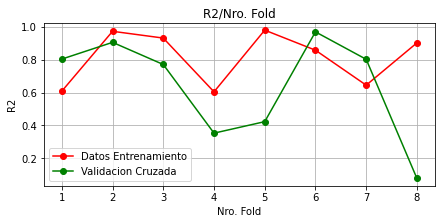

In [159]:
graficar_r2_scores(regr,X_train,y_train,X_test,y_test,nparts=8,jobs=2)

Luego se puede establecer que es posible estimar la cantidad de Empresas activas en un periodo en función de las hipotecas y ubicación geográfica.
